In [1]:
import os 
import pandas as pd
from collections import defaultdict
import numpy as np 
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path saving 
gene_eq_path = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_TEST_conf2_annotFrame_cap0_runs/TCGA_Breast_1102'


In [4]:
plot_dir = '/cluster/work/grlab/projects/projects2020_OHSU/plots'
plot_dir = os.path.join(plot_dir, 'MS_single_sample_plots')
#os.mkdir(plot_dir)
base_plot = 'v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA'
save_suffix = 'fix-sample_filtered-spladder'

In [ ]:
print(plot_dir)

In [27]:
# Read intermediate file 
df_plot = pd.read_csv(os.path.join(gene_eq_path, 'exp_427_kmers_plot2_fix-sample_filtered-spladder-count.csv.gz'),
                                  #'exp_427_kmers_plot2_fix-sample.csv.gz' #'exp_427_kmers_plot2.csv.gz', #exp_427_kmers_plot
                      compression = 'gzip' )

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,6,7,8,9,10,11,15,1120) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [28]:
samples = ['TCGA-BH-A18V-01A-11R-A12D-07.all', 
        'TCGA-C8-A12P-01A-11R-A115-07.all', 
        'TCGA-AO-A0JM-01A-21R-A056-07.all', 
        'TCGA-A2-A0SX-01A-12R-A084-07.all',
        'TCGA-A2-A0D2-01A-21R-A034-07.all']

In [29]:
df_plot.head()

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence,spladder_GTEX_on_disk,strand_spladder
0,2,56.0,1.0,0.0,0.0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,0,0,...,6.0,0.0,0.0,3.0,True,0.0,0.0,970.0,NaN,NaN
1,2,57.0,1.0,0.0,0.0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,0,0,...,6.0,0.0,0.0,3.0,True,0.0,0.0,970.0,NaN,NaN
2,4,12.0,0.0,0.0,0.0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,0,1,...,156.0,164.0,112.0,651.0,True,1.0,0.0,1100.0,NaN,NaN
3,5,12.0,0.0,0.0,1.0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,2.0,1.0,0.0,4.0,True,1.0,0.0,972.0,NaN,NaN
4,6,12.0,0.0,0.0,0.0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,2.0,1.0,0.0,4.0,True,1.0,0.0,972.0,NaN,NaN


In [30]:
# # TEST 
# grp = df_plot.groupby(['>pepID',
#  "includes_5'",
#  "includes_3'",
#  'gene',
#  'kmer',
#  'peptide',
#  'sample',
#  'percentile_rank',
#  'affinity',
#  'strand',
#  'GTEX_presence',
#  'index',
#  'isCrossJunction',
#  'recurrence']).count()

# grp = grp.loc[grp['jx_pos'] == 2 , :]

# grp = grp.reset_index()

# test = df_plot.set_index('>pepID')

# test = test.loc[grp['>pepID']]

# test =test.drop_duplicates() # 3 exons only 

In [31]:
# # TEST 
# # kmers from 3 exon derived peptides
# test.loc[test['sample'] == 'TCGABHA18V01A11RA12D07all', 'kmer'].unique() 

In [32]:
# Some type conversions
# df_plot['junctionAnnotated'] = df_plot['junctionAnnotated'].astype(str)
# df_plot['readFrameAnnotated'] = df_plot['readFrameAnnotated'].astype(str)

In [33]:
# Annotate MHC
df_plot['MHC-I binding status'] = 'not computed'

df_plot.loc[df_plot['percentile_rank'] <=2 ,
            'MHC-I binding status'] = 'strong binding'
df_plot.loc[ (10 >= df_plot['percentile_rank']) &
              (df_plot['percentile_rank'] > 2), 
            'MHC-I binding status'] = 'weak binding'
df_plot.loc[ 10 < df_plot['percentile_rank'] ,
            'MHC-I binding status'] = 'not binding'

In [34]:
df_plot.columns

Index(['>pepID', 'jx_pos', 'between_codons', 'includes_5'', 'includes_3'',
       'gene', 'jx_coord', 'kmer', 'readFrameAnnotated', 'junctionAnnotated',
       ...
       'TCGAXXA89A01A11RA36F07all', 'TCGAZ7A8R501A42RA41B07all',
       'TCGAZ7A8R601A11RA41B07all', 'isCrossJunction',
       'junctionAnnotated_kmer', 'readFrameAnnotated_kmer', 'recurrence',
       'spladder_GTEX_on_disk', 'strand_spladder', 'MHC-I binding status'],
      dtype='object', length=1127)

In [35]:
meta_cols = [ col for col in df_plot.columns if 'TCGA' not in col ] 
cohort = [ col for col in df_plot.columns if 'TCGA' in col ] 

In [36]:
meta_cols

['>pepID',
 'jx_pos',
 'between_codons',
 "includes_5'",
 "includes_3'",
 'gene',
 'jx_coord',
 'kmer',
 'readFrameAnnotated',
 'junctionAnnotated',
 'origin',
 'peptide',
 'sample',
 'percentile_rank',
 'affinity',
 'strand',
 'GTEX_presence',
 'index',
 'isCrossJunction',
 'junctionAnnotated_kmer',
 'readFrameAnnotated_kmer',
 'recurrence',
 'spladder_GTEX_on_disk',
 'strand_spladder',
 'MHC-I binding status']

# Correction for kmers from multiple junctions

In [14]:
df_group = df_plot.groupby(['kmer']).sum()
display(df_group.shape)
not_GTEX_cross_samples = df_group.loc[df_group['GTEX_presence'] == 0, :].reset_index()[['kmer']]
not_GTEX_cross_samples = df_plot.merge(not_GTEX_cross_samples, on = 'kmer', how = 'right')

(30082, 1114)

### After removing GTEX

Correction for the sample loading  + the shareness across kmers and across samples

In [ ]:
tmp = not_GTEX_cross_samples.loc[ 
                    (not_GTEX_cross_samples['recurrence'] > 0),
                  ['recurrence', 'kmer' ]].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

In [ ]:
tmp = not_GTEX_cross_samples.loc[not_GTEX_cross_samples['recurrence'] > 30,  
                                 ['recurrence', 'kmer' ]].drop_duplicates()

sns.histplot(data = tmp, x = 'recurrence', bins = 100)

In [ ]:
tmp = not_GTEX_cross_samples.loc[(not_GTEX_cross_samples['recurrence'] > 10) &
                                 (not_GTEX_cross_samples['junctionAnnotated_kmer'] == 0) &
                                 (not_GTEX_cross_samples['GTEX_presence'] == 0), :]
tmp.to_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_TEST_conf2_annotFrame_cap0_runs/TCGA_Breast_1102/exp-427_fix-sample_novel-pep_jx-non-annotated_jx-not-GTEX_recurrence-min-10.csv',
           sep = '\t', index = None)

In [115]:
not_GTEX_cross_samples.loc[(not_GTEX_cross_samples['recurrence'] > 200) &
                                 (not_GTEX_cross_samples['junctionAnnotated_kmer'] == 0) &
                                 (not_GTEX_cross_samples['GTEX_presence'] == 0) &
                                 (not_GTEX_cross_samples['origin'] == '2exons'), 
                           ['jx_coord', 'gene',
                            'kmer', 'recurrence']].drop_duplicates().sort_values(by = ['jx_coord'])

,jx_coord,gene,kmer,recurrence
1,184711444_184709731,ENSG00000177383.5,AAEHLRVPS,457.0
74,184711444_184709731,ENSG00000177383.5,AEHLRVPSS,457.0
280,184711444_184709731,ENSG00000177383.5,ARAAEHLRV,457.0
3927,184711444_184709731,ENSG00000177383.5,RVPSSTKAL,457.0
1587,184711444_184709731,ENSG00000177383.5,HLRVPSSTK,457.0
2577,184711444_184709731,ENSG00000177383.5,LRVPSSTKA,457.0
4625,37069550_37067383,ENSG00000185808.13,TYWPQKQIL,226.0
3483,37069550_37067383,ENSG00000185808.13,QKQILGSCI,226.0
3305,37069550_37067383,ENSG00000185808.13,PQKQILGSC,226.0
2632,37069550_37067383,ENSG00000185808.13,LTYWPQKQI,226.0


In [122]:
not_GTEX_cross_samples.loc[(not_GTEX_cross_samples['includes_5\''] == 0.0)
                          & (not_GTEX_cross_samples['includes_3\''] == 1.0), 'jx_coord'].unique()

array(['184711444_184709731', '44940186_44958774', '54634783_54632381',
       '100677527_100678475', '130130166_130133630', '41585517_41587483',
       '52238706_52243011', '36057108_36054955', '132055019_132055137',
       '69426457_69435482', '65610685_65607320', '105555227_105567118',
       '9943515_9945304', '944778_944737', '23639347_23639793',
       '16890513_16891124', '45630481_45629671', '121799195_121798029',
       '85700560_85698053', '133205542_133205411', '152718637_152718915',
       '55799220_55824580', '49323946_49324258', '28850212_28787889',
       '114298019_114298043', '12113360_12114370', '118686597_118674460',
       '52902029_52901965', '58895626_58909161', '51557_50880',
       '11144142_11147496', '122857215_122859425', '100705006_100704946',
       '95287752_95288229', '42382064_42380578', '94425785_94425840',
       '172950720_172950963', '62388351_62388456', '52238724_52243011',
       '170444046_170458787', '63038659_63037090', '94623300_94625523',
    

# Exploration 

### All 

number of kmers 38995


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

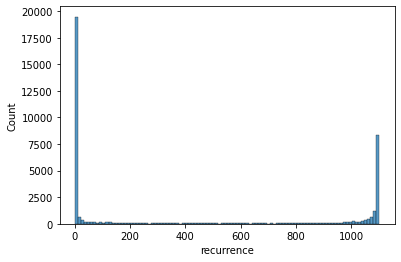

In [16]:
tmp = df_plot.loc[
                    (df_plot['recurrence'] > 0),
                  ['recurrence', 'kmer', 'GTEX_presence' ]].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

### Remove if present in GTEX Graph  

number of kmers 12702


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

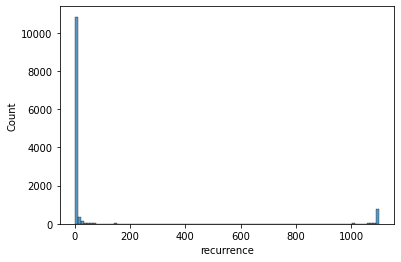

In [17]:
tmp = df_plot.loc[df_plot['GTEX_presence'] == 0
                   & (df_plot['recurrence'] > 0),
                  ['recurrence', 'kmer', 'GTEX_presence' ]].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

### Remove if kmer comes from an annotated junction (or on the same 3-exon peptide)

In [18]:
df_plot['junctionAnnotated_kmer'].unique()

array([ 0.,  1., nan])

number of kmers 10446


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

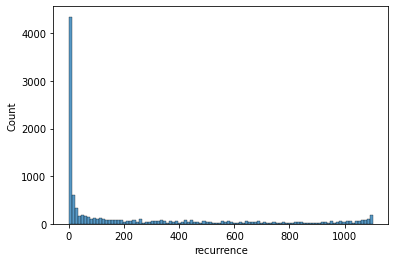

In [19]:
tmp = df_plot.loc[df_plot['junctionAnnotated_kmer'] == 0
                   & (df_plot['recurrence'] > 0), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

In [20]:
df_plot['junctionAnnotated'].unique()

array([0.0, 1.0, nan, '0', '1', '0/1', 'nan/0', '0/nan'], dtype=object)

number of kmers 125


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

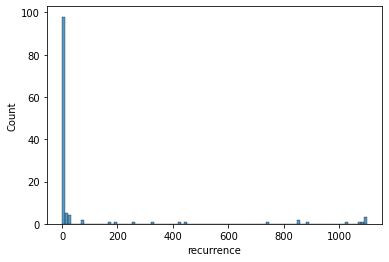

In [21]:
tmp = df_plot.loc[((df_plot['junctionAnnotated'] == '0') | 
                   (df_plot['junctionAnnotated'] == '0/nan') ) &
                   (df_plot['recurrence'] > 0) &
                  (df_plot['GTEX_presence'] == 0) , 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

### Remove if Present in the GTEX spladder counts

In [39]:
df_plot.head()

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence,spladder_GTEX_on_disk,strand_spladder,MHC-I binding status
0,2,56.0,1.0,0.0,0.0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,0,0,...,0.0,0.0,3.0,True,0.0,0.0,970.0,NaN,NaN,weak binding
1,2,57.0,1.0,0.0,0.0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,0,0,...,0.0,0.0,3.0,True,0.0,0.0,970.0,NaN,NaN,weak binding
2,4,12.0,0.0,0.0,0.0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,0,1,...,164.0,112.0,651.0,True,1.0,0.0,1100.0,NaN,NaN,strong binding
3,5,12.0,0.0,0.0,1.0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,1.0,0.0,4.0,True,1.0,0.0,972.0,NaN,NaN,strong binding
4,6,12.0,0.0,0.0,0.0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,1.0,0.0,4.0,True,1.0,0.0,972.0,NaN,NaN,strong binding


In [40]:
df_plot['strand_spladder'].unique()

array([nan])

number of kmers 30113


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

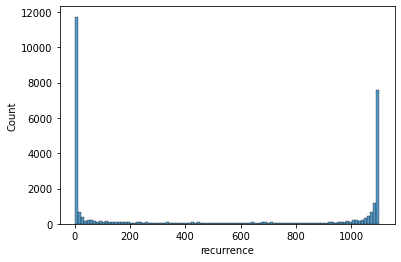

In [25]:
tmp = df_plot.loc[df_plot['spladder_GTEX_on_disk'] != 1
                   & (df_plot['recurrence'] > 0), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

### Remove if kmer comes from an annotated junction (or on the same 3-exon peptide) 
### Remove GTEX junctions with graph 

number of kmers 4123


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

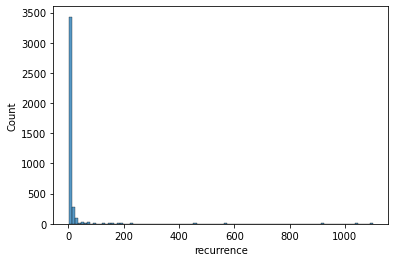

In [22]:
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

number of kmers 3783


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

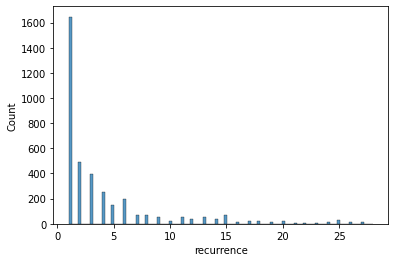

In [23]:
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 0) &
                  (df_plot['recurrence'] < 30), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

number of kmers 782


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

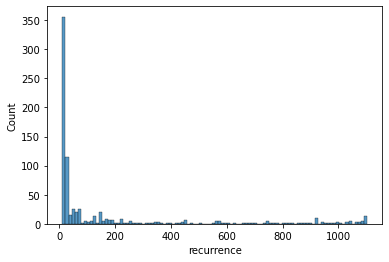

In [24]:
tmp = df_plot.loc[(df_plot['GTEX_presence'] == 0) &
                  (df_plot['junctionAnnotated_kmer'] == 0) &
                  (df_plot['recurrence'] > 10), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

In [23]:
tmp

,recurrence,kmer
1,970.0,AAAALQQHS
88,457.0,AAEHLRVPS
168,944.0,AALARWRAN
425,1068.0,ACKVIVTTG
946,40.0,AEQPPGLHL
...,...,...
802017,12.0,YRSMPSVAD
802222,12.0,YSYRSMPSV
802224,14.0,YTAYYPRRK
802388,226.0,YWPQKQILG


# TEST Extract remaining

In [24]:
## DEBUG: high recurrence, junction non annotated, not in GTEX
remaining_recurrenct = df_plot.merge(tmp, on = 'kmer', how = 'right')

## DEBUG: high recurrence, junction non annotated, not in GTEX
## Look if they come from >1 junction position 
## (bug in Andy files, = bug in junction annotated) 

remaining_recurrenct2 = pd.DataFrame.from_records(
    remaining_recurrenct.groupby(['kmer',  'jx_pos']).count().index)

display(remaining_recurrenct2.head())

remaining_recurrenct3 = remaining_recurrenct2.groupby([0]).count().reset_index().rename(
    {0:'kmer', 1:'number_jx_pos'}, axis = 1)

remaining_recurrenct3 = remaining_recurrenct3.loc[
    remaining_recurrenct3['number_jx_pos'] == 1, :]

remaining_recurrenct3 = df_plot.merge(remaining_recurrenct3, on = 'kmer', how = 'right')

display(remaining_recurrenct3.head())
display(remaining_recurrenct3.shape)
display(remaining_recurrenct3['jx_coord'].unique().shape)

,0,1
0,AAAALQQHS,56.0
1,AAAALQQHS,57.0
2,AAEHLRVPS,125.0
3,AAGGLHGEF,24.0
4,AALARWRAN,13.0


,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence,MHC-I binding status,number_jx_pos
0,94,125.0,0.0,0.0,1.0,ENSG00000177383.5,184711444_184709731,AAEHLRVPS,1,0,...,0.0,0.0,0.0,0.0,True,0.0,1.0,457.0,not binder,1
1,87,125.0,0.0,0.0,1.0,ENSG00000177383.5,184711444_184709731,AAEHLRVPS,1,0,...,0.0,0.0,0.0,0.0,True,0.0,1.0,457.0,not binder,1
2,132,24.0,1.0,0.0,0.0,ENSG00000164692.17,94409797_94415225,AAGGLHGEF,0,0,...,0.0,0.0,0.0,0.0,True,0.0,0.0,146.0,not computed,1
3,188,9.0,0.0,0.0,1.0,ENSG00000172354.10,100677527_100678475,AALLLGAPH,0,0,...,0.0,0.0,0.0,0.0,True,0.0,0.0,76.0,weak binder,1
4,524,20.0,1.0,0.0,0.0,ENSG00000138614.15,65610685_65607320,ADGKAKEQG,1,0,...,0.0,0.0,0.0,0.0,True,0.0,1.0,17.0,not binder,1


(866, 1126)

(149,)

(array([705.,  73.,  32.,   4.,  19.,   0.,   0.,   4.,   9.,  20.]),
 array([ 11. , 102.1, 193.2, 284.3, 375.4, 466.5, 557.6, 648.7, 739.8,
        830.9, 922. ]),
 <BarContainer object of 10 artists>)

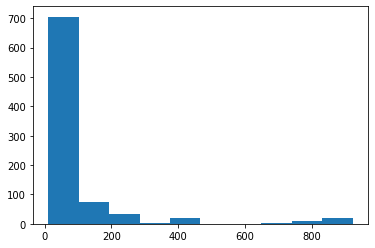

In [25]:
plt.hist(remaining_recurrenct3['recurrence'])

In [26]:
remaining_recurrenct3.loc[(remaining_recurrenct3['recurrence'] > 300 ) & 
                          ((remaining_recurrenct3['TCGABHA18V01A11RA12D07all'] > 0) | 
                          (remaining_recurrenct3['TCGAC8A12P01A11RA11507all'] > 0) | 
                          (remaining_recurrenct3['TCGAAOA0JM01A21RA05607all'] > 0) | 
                          (remaining_recurrenct3['TCGAA2A0SX01A12RA08407all'] > 0) | 
                          (remaining_recurrenct3['TCGAA2A0D201A21RA03407all'] > 0) ) , :]

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence,MHC-I binding status,number_jx_pos
0,94,125.0,0.0,0.0,1.0,ENSG00000177383.5,184711444_184709731,AAEHLRVPS,1,0,...,0.0,0.0,0.0,0.0,True,0.0,1.0,457.0,not binder,1
1,87,125.0,0.0,0.0,1.0,ENSG00000177383.5,184711444_184709731,AAEHLRVPS,1,0,...,0.0,0.0,0.0,0.0,True,0.0,1.0,457.0,not binder,1
12,890,125.0,0.0,0.0,1.0,ENSG00000177383.5,184711444_184709731,AEHLRVPSS,1,0,...,0.0,0.0,0.0,0.0,True,0.0,1.0,457.0,weak binder,1
63,4018,125.0,0.0,0.0,1.0,ENSG00000177383.5,184711444_184709731,ARAAEHLRV,1,0,...,0.0,0.0,0.0,0.0,True,0.0,1.0,457.0,not binder,1
143,15690,16.0,0.0,0.0,1.0,ENSG00000057608.17,5781219_5765717,ETVFFNLLI,0,0,...,3.0,2.0,3.0,1.0,True,0.0,0.0,922.0,weak binder,1
144,15726,16.0,0.0,0.0,1.0,ENSG00000057608.17,5781219_5765717,ETVFFNLLI,0,0,...,3.0,2.0,3.0,1.0,True,0.0,0.0,922.0,weak binder,1
150,15789,12.0,0.0,0.0,1.0,ENSG00000131652.14,3025961_3026044,FELRSQRGN,0,0,...,1.0,1.0,1.0,0.0,True,0.0,0.0,424.0,weak binder,1
151,15790,12.0,0.0,0.0,1.0,ENSG00000131652.14,3025961_3026044,FELRSQRGN,0,0,...,1.0,1.0,1.0,0.0,True,0.0,0.0,424.0,weak binder,1
152,15791,12.0,0.0,0.0,1.0,ENSG00000131652.14,3025961_3026044,FELRSQRGN,0,0,...,1.0,1.0,1.0,0.0,True,0.0,0.0,424.0,weak binder,1
153,15792,12.0,0.0,0.0,1.0,ENSG00000131652.14,3025961_3026062,FELRSQRGN,0,0,...,1.0,1.0,1.0,0.0,True,0.0,0.0,424.0,weak binder,1


In [27]:
remaining_recurrenct3.loc[(remaining_recurrenct3['recurrence'] > 300 ) & 
                          ((remaining_recurrenct3['TCGABHA18V01A11RA12D07all'] > 0) | 
                          (remaining_recurrenct3['TCGAC8A12P01A11RA11507all'] > 0) | 
                          (remaining_recurrenct3['TCGAAOA0JM01A21RA05607all'] > 0) | 
                          (remaining_recurrenct3['TCGAA2A0SX01A12RA08407all'] > 0) | 
                          (remaining_recurrenct3['TCGAA2A0D201A21RA03407all'] > 0) ) , 
                          ['recurrence', 'jx_coord', 'gene', 'kmer', 'peptide']].drop_duplicates()


,recurrence,jx_coord,gene,kmer,peptide
0,457.0,184711444_184709731,ENSG00000177383.5,AAEHLRVPS,MLQTPESRGLPVPQAEGEKDGGHDGETRAPTASQERPKEELGAGRE...
12,457.0,184711444_184709731,ENSG00000177383.5,AEHLRVPSS,MLQTPESRGLPVPQAEGEKDGGHDGETRAPTASQERPKEELGAGRE...
63,457.0,184711444_184709731,ENSG00000177383.5,ARAAEHLRV,MLQTPESRGLPVPQAEGEKDGGHDGETRAPTASQERPKEELGAGRE...
143,922.0,5781219_5765717,ENSG00000057608.17,ETVFFNLLI,SFIILSVHLNLIHLETVFFNLLISVAMCCCCSRAGSIQVVCHLSS
150,424.0,3025961_3026044,ENSG00000131652.14,FELRSQRGN,LVLCFELRSQRGNSAFLFSP
153,424.0,3025961_3026062,ENSG00000131652.14,FELRSQRGN,LVLCFELRSQRGNP
154,424.0,3025961_3026084,ENSG00000131652.14,FELRSQRGN,LVLCFELRSQRGNMVSTDRHLLSAGDGEVKAWLWAEMLKK
229,922.0,5781219_5765717,ENSG00000057608.17,HLETVFFNL,SFIILSVHLNLIHLETVFFNLLISVAMCCCCSRAGSIQVVCHLSS
233,457.0,184711444_184709731,ENSG00000177383.5,HLRVPSSTK,MLQTPESRGLPVPQAEGEKDGGHDGETRAPTASQERPKEELGAGRE...
259,922.0,5781219_5765717,ENSG00000057608.17,IHLETVFFN,SFIILSVHLNLIHLETVFFNLLISVAMCCCCSRAGSIQVVCHLSS


In [28]:
remaining_recurrenct3.shape

(866, 1126)

In [98]:
# remaining_recurrenct3.to_csv(
#     os.path.join(gene_eq_path, 
#                  'exp-427_novel-pep_jx-non-annotated_jx-not-GTEX_recurrence-min-10.csv'), 
#     index = None)
# print(gene_eq_path)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_conf2_annotFrame_cap0_runs/TCGA_Breast_1102
